In [12]:
import pandas as pd

graduate_df = pd.read_csv(
    './datasets/graduate_employment_statistics_2023.csv',
    skiprows=14,
)
display(graduate_df)

,조사기준일,학제,학교명,KEDI\n학교코드,학교상태,본분교,시도,설립,학위구분,졸업자_계,...,3차 유지취업률_여,4차 유지취업자_계,4차 유지취업자_남,4차 유지취업자_여,4차 유지취업률_계,4차 유지취업률_남,4차 유지취업률_여,입학당시 기취업자_계,입학당시 기취업자_남,입학당시 기취업자_여
0,2023.12.31,전문대학,가톨릭상지대학교,73001000,기존,본교,경북,사립,NaN,638,...,83.6,345,114,231,81.8,80.9,82.2,109,37,72
1,2023.12.31,전문대학,강동대학교,73024000,기존,본교,충북,사립,NaN,1154,...,78.5,477,207,270,76.2,76.1,76.3,217,100,117
2,2023.12.31,전문대학,강릉영동대학교,73102000,기존,본교,강원,사립,NaN,818,...,81.0,379,138,241,76.7,73.0,79.0,85,39,46
3,2023.12.31,전문대학,강원관광대학교,73135000,기존,본교,강원,사립,NaN,101,...,95.5,66,24,42,94.3,92.3,95.5,13,1,12
4,2023.12.31,전문대학,강원도립대학교,72001000,기존,본교,강원,공립,NaN,185,...,73.8,64,36,28,68.8,70.6,66.7,7,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,2023.12.31,기능대학,한국폴리텍대학 영남융합기술캠퍼스,Z3190000,기존,본교,대구,사립,NaN,79,...,50.0,21,15,6,56.8,60.0,50.0,7,5,2
1922,2023.12.31,기능대학,한국폴리텍대학 인천캠퍼스,Z3120000,기존,본교,인천,사립,NaN,843,...,71.0,427,405,22,78.5,78.9,71.0,162,155,7
1923,2023.12.31,기능대학,한국폴리텍대학 항공캠퍼스,Z3210000,기존,본교,경남,사립,NaN,260,...,50.0,127,125,2,77.9,78.6,50.0,11,10,1
1924,2023.12.31,기능대학,한국폴리텍대학바이오캠퍼스,Z3180000,기존,본교,충남,사립,NaN,211,...,93.6,144,101,43,83.2,80.2,91.5,8,6,2


In [11]:
graduate_df.head(5)

,2023.12.31,전문대학,가톨릭상지대학교,73001000,기존,본교,경북,사립,Unnamed: 8,638,...,83.6,345,114,231,81.8,80.9,82.2,109,37,72
0,2023.12.31,전문대학,강동대학교,73024000,기존,본교,충북,사립,NaN,1154,...,78.5,477,207,270,76.2,76.1,76.3,217,100,117
1,2023.12.31,전문대학,강릉영동대학교,73102000,기존,본교,강원,사립,NaN,818,...,81.0,379,138,241,76.7,73.0,79.0,85,39,46
2,2023.12.31,전문대학,강원관광대학교,73135000,기존,본교,강원,사립,NaN,101,...,95.5,66,24,42,94.3,92.3,95.5,13,1,12
3,2023.12.31,전문대학,강원도립대학교,72001000,기존,본교,강원,공립,NaN,185,...,73.8,64,36,28,68.8,70.6,66.7,7,4,3
4,2023.12.31,전문대학,거제대학교,73003000,기존,본교,경남,사립,NaN,340,...,87.1,193,94,99,87.7,90.4,85.3,47,26,21


In [14]:
cols = [
    '학교명', '시도', '설립', '졸업자_계',
    '취업률_계', '취업률_남', '취업률_여'
]
graduate_core = graduate_df[cols]
display(graduate_core.head())

,학교명,시도,설립,졸업자_계,취업률_계,취업률_남,취업률_여
0,가톨릭상지대학교,경북,사립,638,80.4,83.1,79.1
1,강동대학교,충북,사립,1154,73.0,70.7,75.0
2,강릉영동대학교,강원,사립,818,74.0,74.1,74.0
3,강원관광대학교,강원,사립,101,74.3,64.4,82.1
4,강원도립대학교,강원,공립,185,69.7,71.1,68.1


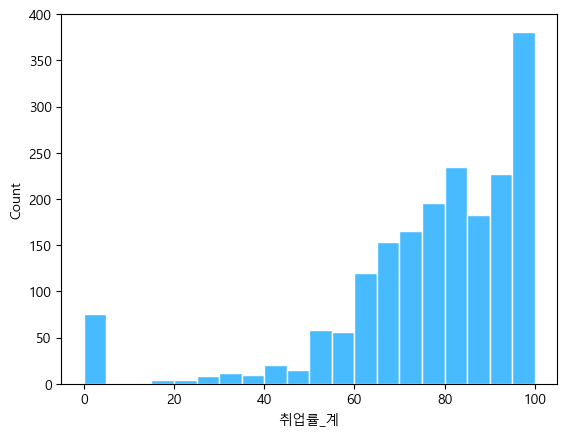

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# city_rate = graduate_df.groupby('학교명')['취업률_계'].mean().sort_values(ascending=False)
sns.histplot(graduate_df['취업률_계'], bins=20, color='#0aa5ff', edgecolor='#fff')
plt.show()

# print(graduate_df['취업률_계'].describe())
# print(graduate_df['취업률_계'].head(20))

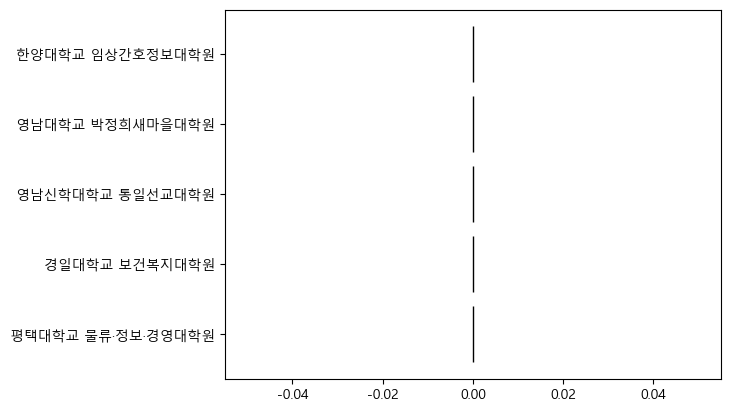

In [63]:
low5 = city_rate.tail(5)

plt.barh(low5.index, low5.values, color='#ff6b6b', edgecolor='black')
plt.show()